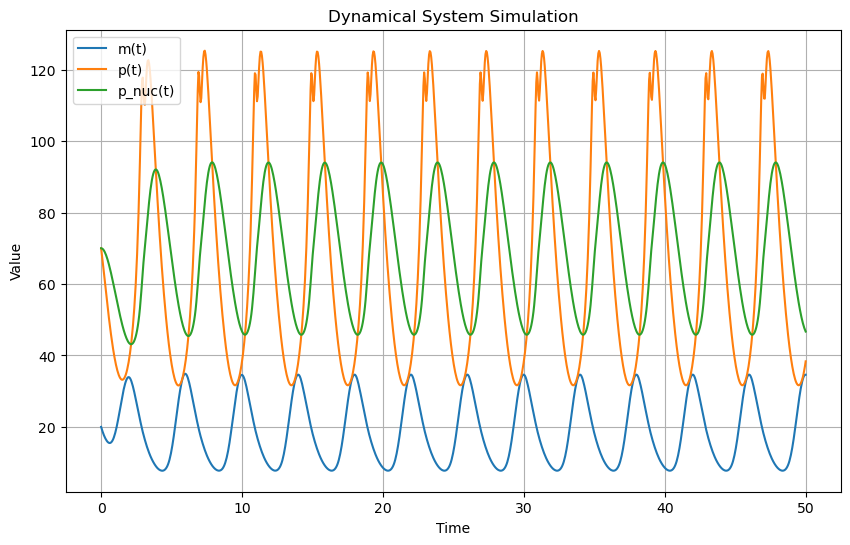

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义微分方程系统
def system(t, y):
    m, p, p_nuc = y  # 解包当前状态
    alpha=200
    a_t=40
    alpha0=1
    c_d=100
    e=50
    f=50
    A=50
    omega=np.pi/2
    # 计算中间变量
    x = A * (1 + np.sin(omega * t))
    n = x / c_d
    g_numerator = (e*f - 1)*n + 1
    g_denominator = ((f - 1)*n + 1) * ((e - 1)*n + 1)
    g = g_numerator / g_denominator
    
    # 计算a_f
    temp = a_t - p - 1
    a_f = 0.5 * (temp + np.sqrt(temp**2 + 4*a_t))
    
    # 计算导数
    dmdt = alpha * (a_f / a_t) - m
    dpdt = alpha0 * g * m - p
    dpnucdt = p - p_nuc
    
    return [dmdt, dpdt, dpnucdt]

# 初始条件
y0 = [20, 70, 70]  # [m0, p0, p_nuc0]

# 时间范围
t_span = (0, 50)  # 模拟0到50秒
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # 输出时间点

# 求解微分方程
sol = solve_ivp(
    fun=system,
    t_span=t_span,
    y0=y0,
    t_eval=t_eval,
    method='RK45'  # 推荐方法
)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='m(t)')
plt.plot(sol.t, sol.y[1], label='p(t)')
plt.plot(sol.t, sol.y[2], label='p_nuc(t)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Dynamical System Simulation')
plt.legend()
plt.grid(True)
plt.show()